In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.graph_objects import Figure
import plotly.graph_objects as go
import plotly.express as px


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.shape

(1630, 6)

In [4]:
df.head()

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5*


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB


## Data cleaning

#### Checking Null values

In [7]:
df.isnull().sum()

Name                0
Location            4
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64

In [8]:
(df.isnull().sum() /len(df) ) *100

Name              0.000000
Location          0.245399
Study Program     0.000000
Sector           32.453988
Affiliation      90.490798
Rating            0.000000
dtype: float64

<Axes: >

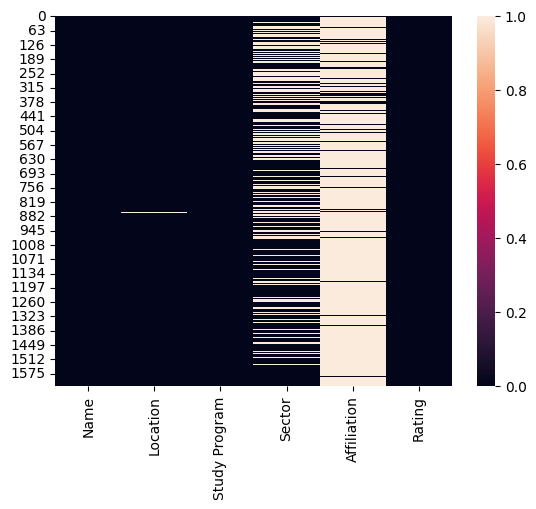

In [9]:
sns.heatmap(df.isnull())

* Affiliation column has 90 % of missing values.
* Sector column has 32 % of missing values.
* Location have only 4 missing values.

### Dealing with missing values

* We can drop the column Affiliation due to it's 90 % of mising values.
* Location have only 4 missing values so we can drop 4 rows.
* In Sector column we can add Semi in place of mising value 

In [10]:
df.dropna(subset=['Location'], inplace=True)


In [11]:
df['Sector'].fillna(value="Semi", inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_3180\390573714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sector'].fillna(value="Semi", inplace=True)


In [12]:
df.shape

(1626, 6)

In [13]:
df.drop(columns='Affiliation', inplace=True)

### Checking for duplicate data

In [14]:
df[df.duplicated()].sum()

Name             0
Location         0
Study Program    0
Sector           0
Rating           0
dtype: object

In [15]:
df.describe()

,Name,Location,Study Program,Sector,Rating
count,1626,1626,1626,1626,1626
unique,1626,1573,772,3,21
top,Campus.pk Lahore,Chakwal,FA ICS Computer Science FSc Pre Medical FSc Pr...,Private,0*
freq,1,11,49,561,1116


### We can make a new column by name of city derived from Name column for better understanding, because given column of Location in data has mixed up values that includes postal codes, postal address along city names.

In [16]:
df['City'] = df['Name'].apply(lambda x:x.split()[-1])

In [17]:
df.sample(4)

,Name,Location,Study Program,Sector,Rating,City
408,"Cadet College Razmak, Bannu","Razmak, North Waziristan Agency, Federally Adm...",FA Icom FSc Pre Engineering FSc Pre Medical IC...,Semi,0*,Bannu
762,Govt Degree College for Women Bilal Gunj Lahore,Govt Degree College for Women Bilal Gunj Lahore,FA FSc Pre Engineering FSc Pre Medical ICom ICS,Public,0.5*,Lahore
26,Govt MAO College Lahore,Lower Mall Road Lahore opp Edcuation University,FSc Pre Engineering ICS Statistics ICS Physics...,Public,4*,Lahore
1254,Cast Metals & Foundry Technology Centre Sialkot,"Small Industries Estate, Daska, Sialkot.",Diploma in Associate Engineers in Mechanical T...,Private,0*,Sialkot


### We can also remove the * sign in the rating column for making it int-data type for better use during plotting.

In [18]:
df['Rating'] = df['Rating'].str.replace('*', '')

In [19]:
df['Rating'] = df['Rating'].astype('float').round()


In [20]:
df['Rating'] = df['Rating'].astype('int')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1626 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1626 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1626 non-null   object
 3   Sector         1626 non-null   object
 4   Rating         1626 non-null   int32 
 5   City           1626 non-null   object
dtypes: int32(1), object(5)
memory usage: 82.6+ KB


<Axes: >

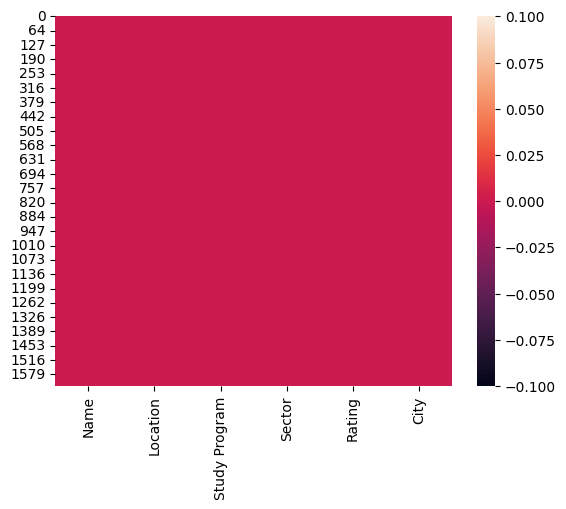

In [22]:
sns.heatmap(df.isnull())

## Now we are all set for exploring our Data

In [23]:
df.nunique()

Name             1626
Location         1573
Study Program     772
Sector              3
Rating              6
City              176
dtype: int64

### Number of Sectors

In [32]:
df['Sector'].value_counts()

Sector
Private    561
Public     539
Semi       526
Name: count, dtype: int64

<Axes: xlabel='Sector'>

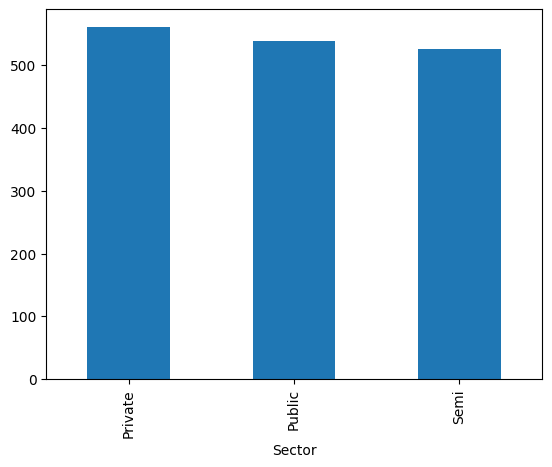

In [24]:
df['Sector'].value_counts().plot(kind='bar')

### Sectors performance according to the raings.

<Axes: xlabel='Rating', ylabel='count'>

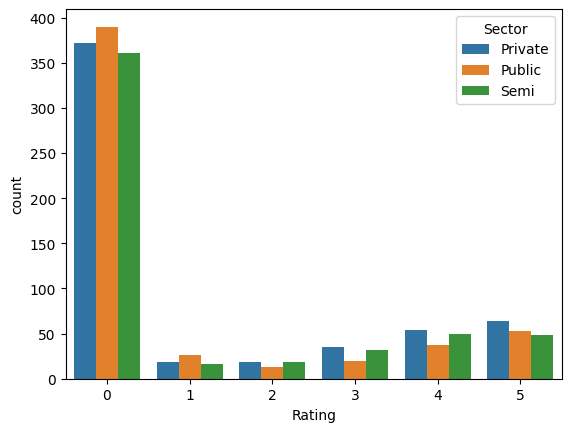

In [25]:
sns.countplot(df, x="Rating", hue="Sector")

### Number of Colleges in each city.

In [37]:
px.scatter(df['City'].value_counts(), color=df['City'].value_counts().index)

### The Top cities having highes number of colleges from 20 to 203.

In [ ]:

fig = px.bar(x=df['City'].value_counts().head(21).index, y=df['City'].value_counts().head(21).values, color=df['City'].value_counts().head(21).index)
fig.show()

### Number of Colleges in Major cities Of Pakistan

In [38]:
top_cities = ['Lahore', 'Peshawar', 'Quetta', 'Islamabad', 'Karachi','Faisalabad','Rawalpindi']

In [40]:
print("Number of colleges present in Lahore are: ", df[df["City"]=="Lahore"].value_counts().sum())
print("Number of colleges present in karachi are: ", df[df["City"]=="Karachi"].value_counts().sum())
print("Number of colleges present in Peshawar are: ", df[df["City"]=="Peshawar"].value_counts().sum())
print("Number of colleges present in Quetta are: ", df[df["City"]=="Quetta"].value_counts().sum())
print("Number of colleges present in Islamabad are: ", df[df["City"]=="Islamabad"].value_counts().sum())
print("Number of colleges present in Faisalabad are: ", df[df["City"]=="Faisalabad"].value_counts().sum())
print("Number of colleges present in Rawalpindi are: ", df[df["City"]=="Rawalpindi"].value_counts().sum())

Number of colleges present in Lahore are:  203
Number of colleges present in karachi are:  105
Number of colleges present in Peshawar are:  61
Number of colleges present in Quetta are:  11
Number of colleges present in Islamabad are:  115
Number of colleges present in Faisalabad are:  86
Number of colleges present in Rawalpindi are:  94


### Top Colleges in Major cities of Pakistan.

In [41]:
df[(df['City'].isin(top_cities)) & (df['Rating'] >= 4) ]['City'].value_counts()

City
Lahore        44
Karachi       22
Islamabad     16
Faisalabad    16
Rawalpindi    16
Peshawar      14
Quetta         5
Name: count, dtype: int64

<Axes: xlabel='City'>

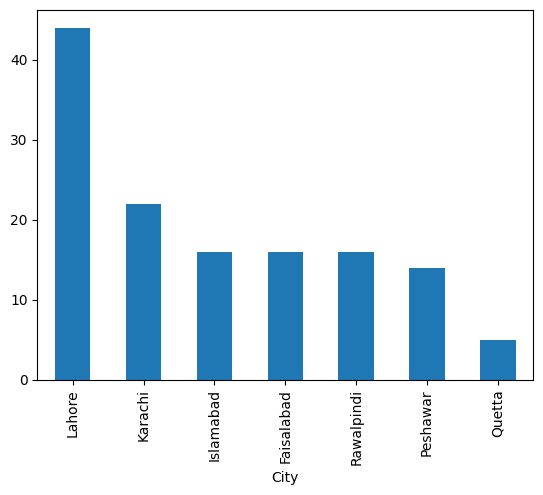

In [42]:
df[(df['City'].isin(top_cities)) & (df['Rating'] >= 4) ]['City'].value_counts().plot(kind='bar')

### Number of Top Public sectors in major cities 

In [43]:
df[(df['City'].isin(top_cities)) & (df['Rating'] >= 4) & (df['Sector'] == "Public" ) ]['City'].value_counts()

City
Lahore        14
Faisalabad    10
Peshawar       6
Islamabad      3
Quetta         3
Rawalpindi     2
Karachi        1
Name: count, dtype: int64

<Axes: xlabel='City'>

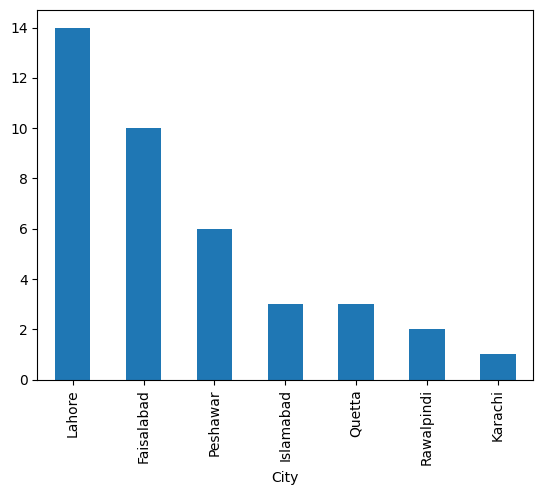

In [44]:
df[(df['City'].isin(top_cities)) & (df['Rating'] >= 4) & (df['Sector'] == "Public" ) ]['City'].value_counts().plot(kind='bar')

* Lahore and Faisalabad had the most Top colleges of Public Sector.

### Number of Top Private sector Colleges in major cities.

In [45]:
df[(df['City'].isin(top_cities)) & (df['Rating'] >= 4) & (df['Sector'] == "Private" ) ]['City'].value_counts()

City
Lahore        12
Rawalpindi     9
Islamabad      7
Faisalabad     2
Karachi        2
Peshawar       1
Name: count, dtype: int64

<Axes: xlabel='City'>

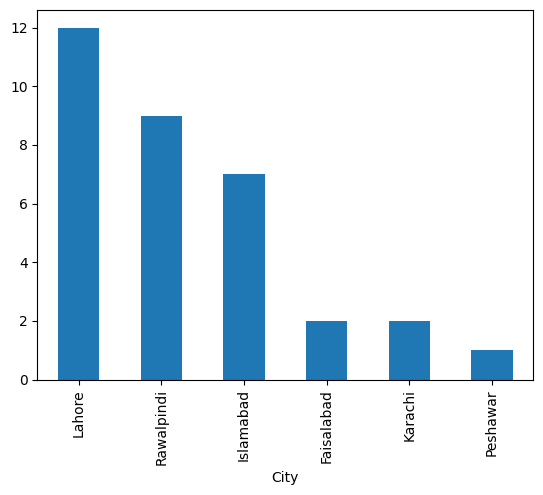

In [47]:
df[(df['City'].isin(top_cities)) & (df['Rating'] >= 4) & (df['Sector'] == "Private" ) ]['City'].value_counts().plot(kind='bar')

* In sense of Rating Lahore is on top in Private Sector too. 

In [48]:
fig = px.sunburst(data_frame=df, 
                  path=["Sector", "City", "Rating"], 
                  width=1200, 
                  height=1000, 
                  color="City",
                  maxdepth=3,
                  hover_data=["Sector", "City", "Rating"])

fig.show()

### Overview of Private Sector in Pakistan.
* In Pakistan number of Private Sectors are greater then Public Sector colleges.
* In Quality Education Private Sector has overall good performance especially in major cities like Islamabad, Lahore and Quetta.
### Overview of Public Sector in Pakistan.
* Public sectors have good rating only in major cities only.
* In rural areas Public sector still need development.
  
### Overall.
* Overall the best educational institutes both Public and Private are in Lahore with top Ratings.
  